# PyTorch Basics
- Numpy + AutoGrad 라는 장점이 있다.
- Numpy operation이 torch에도 거의 적용된다.
- Numpy의 ndarray가 파이토치의 tensor와 동일하다고 보면 된다.

In [27]:
import torch
import numpy as np

In [7]:
data = [[3,5], [10,5]]
x_data = torch.tensor(data)
x_data

tensor([[ 3,  5],
        [10,  5]])

## reshape 대신에 view를 쓰면 된다.
- 동작은 거의 비슷하다
- 메모리 주소를 그대로 가져오냐 아니냐의 차이인듯

In [4]:
tensor_ex = torch.rand(size=(2,3,2))
tensor_ex

tensor([[[0.6167, 0.3867],
         [0.8660, 0.2780],
         [0.6718, 0.2702]],

        [[0.7757, 0.0993],
         [0.5560, 0.1310],
         [0.4227, 0.9483]]])

In [8]:
print(tensor_ex.view([-1,6]))
print(tensor_ex.reshape([-1,6]))

tensor([[0.6167, 0.3867, 0.8660, 0.2780, 0.6718, 0.2702],
        [0.7757, 0.0993, 0.5560, 0.1310, 0.4227, 0.9483]])
tensor([[0.6167, 0.3867, 0.8660, 0.2780, 0.6718, 0.2702],
        [0.7757, 0.0993, 0.5560, 0.1310, 0.4227, 0.9483]])


In [6]:
tensor_ex.reshape([-1,6])

tensor([[0.6167, 0.3867, 0.8660, 0.2780, 0.6718, 0.2702],
        [0.7757, 0.0993, 0.5560, 0.1310, 0.4227, 0.9483]])

In [11]:
a = torch.zeros(3,2)
b = a.view(2,3)

# b에도 1이 들어간 형태로 바뀜
print(a.fill_(1))
print(b)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])


## squeeze & unsqueeze

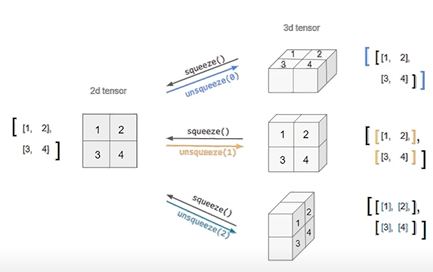

In [21]:
tensor_ex = torch.rand(size=(2,1,2))
print(tensor_ex.squeeze())
print(tensor_ex.squeeze().shape)

tensor([[0.8439, 0.3820],
        [0.4054, 0.6126]])
torch.Size([2, 2])


In [24]:
tensor_ex = torch.rand(size=(2,2))

print(tensor_ex.unsqueeze(0).shape)
print(tensor_ex.unsqueeze(1).shape)
print(tensor_ex.unsqueeze(2).shape)

torch.Size([1, 2, 2])
torch.Size([2, 1, 2])
torch.Size([2, 2, 1])


## 행렬 곱셈 연산은 dot이 아닌 mm 또는 matmul을 사용함
- 파이토치에서는 둘을 구분한다.
- 스칼라 또는 벡터에서 내적 구할 때는 dot을 쓰지만, 행렬 연산에는 mm을 쓰자

In [28]:
n1 = np.arange(10).reshape(2,5)
t1 = torch.FloatTensor(n1)
n2 = np.arange(10).reshape(5,2)
t2 = torch.FloatTensor(n2)

print(t1.mm(t2))
print(t1.matmul(t2))

tensor([[ 60.,  70.],
        [160., 195.]])
tensor([[ 60.,  70.],
        [160., 195.]])


### matmul은 broadcasting을 지원한다
- mm은 브로드캐스팅 지원 안 함.

In [35]:
a = torch.rand(5,2,3)
b = torch.rand(3)
# print(a.mm(b)) ### error 뜸

In [36]:
a = torch.rand(5,2,3)
b = torch.rand(3)
a.matmul(b)

tensor([[0.9357, 0.7609],
        [1.1023, 1.4441],
        [0.1754, 0.9936],
        [1.1666, 0.8603],
        [0.7678, 1.1202]])

### argmax, argmin
- dim = 0, dim = 1을 axis = 0, axis = 1처럼 사용
- 원핫인코딩에 사용 가능

In [50]:
import torch.nn.functional as F

y = torch.randint(5, (10,5))
y

tensor([[2, 1, 1, 4, 2],
        [1, 4, 1, 2, 2],
        [0, 3, 3, 1, 3],
        [3, 2, 3, 2, 4],
        [2, 4, 1, 4, 3],
        [4, 0, 4, 3, 4],
        [3, 2, 4, 1, 4],
        [0, 0, 1, 4, 0],
        [1, 2, 3, 2, 1],
        [4, 4, 4, 3, 4]])

In [51]:
print(y.argmax(dim=0))
print(y.argmax(dim=1))

tensor([9, 9, 9, 7, 9])
tensor([3, 1, 4, 4, 3, 4, 4, 3, 2, 4])


In [52]:
F.one_hot(y.argmax(dim=1))

tensor([[0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 0, 1],
        [0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 0, 1]])

### AutoGrad (자동 미분)

In [53]:
w = torch.tensor(2.0, requires_grad = True)
y = w**2
z = 10*y + 2
z.backward()
w.grad

tensor(40.)

---
## 파이토치 프로젝트 템플릿 추천
- https://github.com/FrancescoSaverioZuppichini/PyTorch-Deep-Learning-Template
- https://github.com/PyTorchLightning/deep-learning-project-template
- https://github.com/victoresque/pytorch-template

이 중에서 3번째 링크 강추